In [304]:
# Gladson Scaria 19200433
## importing libraries
import os
import urllib.request
import csv
import json
import pandas as pd 
import requests
import time
from operator import itemgetter
from datetime import datetime

In [305]:
# 1: Identifying  suitable web APIs

## The Dark Sky API allows you to look up the weather anywhere on the globe, returning (where available):
## Current weather conditions
## Minute-by-minute forecasts out to one hour
## Hour-by-hour and day-by-day forecasts out to seven days
## Hour-by-hour and day-by-day observations going back decades
## Severe weather alerts in the US, Canada, European Union member nations, and Israel

api_key='8b76f4f009ff78fbe32a3a42f4d5761e'

link='https://api.darksky.net/forecast/8b76f4f009ff78fbe32a3a42f4d5761e/53.2734,-7.77832031?extend=hourly'

In [306]:
# 2.Collecting data from chosen API

response = requests.get(link).json()
data_file = json.dumps(response,sort_keys= True,indent=2)

df=open("data_file.json","w")
df.write(data_file)
df.close()


In [307]:
# 3.Parsing the collected data, and storing it in an appropriate file format

df2=open('data_file.json','r')
df2_string=df2.read()
DublinAirportWeatherUncleanPhase1=json.loads(df2_string)


In [308]:
# 4.Loading and representing the data using an appropriate data structure. Applying  pre-processing steps to clean/filter/combine the data
# DublinAirportWeatherUncleanPhase1.keys()

In [309]:
#### deleting unwanted keys
del DublinAirportWeatherUncleanPhase1['flags']
del DublinAirportWeatherUncleanPhase1['latitude']
del DublinAirportWeatherUncleanPhase1['longitude']
del DublinAirportWeatherUncleanPhase1['offset']
del DublinAirportWeatherUncleanPhase1['timezone']

In [310]:
#### loading data in a different dataframe

DublinAirportWeatherUncleanPhase2=DublinAirportWeatherUncleanPhase1

In [311]:
#### creating a list which contains all the keys storing time
search_key='Time'
TimeList=[key for key, val in DublinAirportWeatherUncleanPhase2['daily']['data'][0].items() if search_key in key]

In [312]:
####storing only hourly data in a new dataframe for further manipulation
DublinAirportWeatherHourlyDf=pd.DataFrame(DublinAirportWeatherUncleanPhase2['hourly']['data'])

In [313]:
#### converting unix time to readable date format
DublinAirportWeatherHourlyDf.time= pd.to_datetime(DublinAirportWeatherHourlyDf.time,unit='s')

In [314]:
####converting farenheit to celsius for certains columns
DublinAirportWeatherHourlyDf.apparentTemperature=round((DublinAirportWeatherHourlyDf.apparentTemperature- 32) / 1.8,2)
DublinAirportWeatherHourlyDf.temperature=round((DublinAirportWeatherHourlyDf.temperature- 32) / 1.8,2)

In [315]:
### Phase 2 of data extraction to extract data archive data
#### extracting data from 2012 to 2019
from dateutil import rrule
from datetime import datetime, timedelta

#### creating in array of dates from 2012 to 2019 with timestamps
DateValues=[]
for year in range(2012,2020):
    now = datetime.strptime(str(year)+str('-03-28'+'T'+'12:03:49'), '%Y-%m-%d'+'T'+'%H:%M:%S')
    EightdaysLater = now + timedelta(days=8)
    for dt in rrule.rrule(rrule.DAILY, dtstart=now, until=EightdaysLater):
            DateValues.append(str(dt))

#### Each value of the date and time is seperated by 'T'[api requirement]
DateValues = [w.replace(' ', 'T') for w in DateValues]


In [316]:
#### extracting data for each year and given dates by appending the DateValues list to the api
archiveDataList = []
i=0
while i < len(DateValues):
    apiLnksLst = requests.get("https://api.darksky.net/forecast/8b76f4f009ff78fbe32a3a42f4d5761e/53.2734,-7.77832031," + DateValues[i]).json()
    archiveDataList.append(apiLnksLst)
    i = i + 1

In [317]:
####Obtaining a dataframe for manipulation

DublinAirportWeatherArchiveDf=pd.DataFrame(archiveDataList)

In [319]:
####decalring variables to store required key values from the dataframe
DublinAirportWeatherArchiveDaily=pd.DataFrame() 
time=pd.Series([])
temperatureHigh=pd.Series([])
temperatureHighTime=pd.Series([])
temperatureLow=pd.Series([])
temperatureLowTime=pd.Series([])
apparentTemperatureHigh=pd.Series([])
apparentTemperatureHighTime=pd.Series([])
apparentTemperatureLow=pd.Series([])
apparentTemperatureLowTime=pd.Series([])
dewPoint=pd.Series([])
humidity=pd.Series([])
pressure=pd.Series([])
windSpeed=pd.Series([])
windBearing=pd.Series([])
uvIndex=pd.Series([])
uvIndexTime=pd.Series([])

In [320]:
#### inserting values to the variables
for i in range(len(DublinAirportWeatherArchiveDf)):
    try :
        time[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['time']
        temperatureHigh[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['temperatureHigh']
        temperatureHighTime[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['temperatureHighTime']
        temperatureLow[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['temperatureLow']
        temperatureLowTime[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['temperatureLowTime']
        apparentTemperatureHigh[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['apparentTemperatureHigh']
        apparentTemperatureHighTime[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['apparentTemperatureHighTime']
        apparentTemperatureLow[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['apparentTemperatureLow']
        apparentTemperatureLowTime[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['apparentTemperatureLowTime']
        dewPoint[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['dewPoint']
        humidity[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['humidity']
        pressure[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['pressure']
        windSpeed[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['windSpeed']
        windBearing[i]=DublinAirportWeatherArchiveDf['daily'][i]['data'][0]['windBearing']
    except:
        continue

In [321]:
#### inserting variables into the dataframe
DublinAirportWeatherArchiveDaily.insert(0,'time',time)
DublinAirportWeatherArchiveDaily.insert(1,'temperatureHigh',temperatureHigh)
DublinAirportWeatherArchiveDaily.insert(2,'temperatureHighTime',temperatureHighTime)
DublinAirportWeatherArchiveDaily.insert(3,'temperatureLow',temperatureLow)
DublinAirportWeatherArchiveDaily.insert(4,'temperatureLowTime',temperatureLowTime)
DublinAirportWeatherArchiveDaily.insert(5,'apparentTemperatureHighTime',apparentTemperatureHighTime)
DublinAirportWeatherArchiveDaily.insert(6,'apparentTemperatureLow',apparentTemperatureLow)
DublinAirportWeatherArchiveDaily.insert(7,'apparentTemperatureLowTime',apparentTemperatureLowTime)
DublinAirportWeatherArchiveDaily.insert(8,'dewPoint',dewPoint)
DublinAirportWeatherArchiveDaily.insert(9,'humidity',humidity)
DublinAirportWeatherArchiveDaily.insert(10,'pressure',pressure)
DublinAirportWeatherArchiveDaily.insert(11,'windSpeed',windSpeed)
DublinAirportWeatherArchiveDaily.insert(12,'windBearing',windBearing)
DublinAirportWeatherArchiveDaily.insert(13,'uvIndex',uvIndex)
DublinAirportWeatherArchiveDaily.insert(14,'uvIndexTime',uvIndexTime)
DublinAirportWeatherArchiveDaily.insert(15,'temperatureMin',temperatureMin)
DublinAirportWeatherArchiveDaily.insert(16,'temperatureMinTime',temperatureMinTime)
DublinAirportWeatherArchiveDaily.insert(17,'temperatureMax',temperatureMax)
DublinAirportWeatherArchiveDaily.insert(18,'temperatureMaxTime',temperatureMaxTime)
DublinAirportWeatherArchiveDaily.insert(19,'apparentTemperatureMin',apparentTemperatureMin)
DublinAirportWeatherArchiveDaily.insert(20,'apparentTemperatureMinTime',apparentTemperatureMinTime)
DublinAirportWeatherArchiveDaily.insert(21,'apparentTemperatureMax',apparentTemperatureMax)
DublinAirportWeatherArchiveDaily.insert(22,'apparentTemperatureMaxTime',apparentTemperatureMaxTime)
DublinAirportWeatherArchiveDaily.insert(23,'apparentTemperatureHigh',apparentTemperatureHigh)

In [322]:
Time_cols = [col for col in DublinAirportWeatherArchiveDaily.columns if 'Time' in col]

#### converting all the unix time to readable time format
DublinAirportWeatherArchiveDaily.time= pd.to_datetime(DublinAirportWeatherArchiveDaily.time,unit='s')
DublinAirportWeatherArchiveDaily.temperatureHighTime= pd.to_datetime(DublinAirportWeatherArchiveDaily.temperatureHighTime,unit='s')
DublinAirportWeatherArchiveDaily.temperatureLowTime= pd.to_datetime(DublinAirportWeatherArchiveDaily.temperatureLowTime,unit='s')
DublinAirportWeatherArchiveDaily.apparentTemperatureHighTime= pd.to_datetime(DublinAirportWeatherArchiveDaily.apparentTemperatureHighTime,unit='s')
DublinAirportWeatherArchiveDaily.apparentTemperatureLowTime= pd.to_datetime(DublinAirportWeatherArchiveDaily.apparentTemperatureLowTime,unit='s')
DublinAirportWeatherArchiveDaily.uvIndexTime= pd.to_datetime(DublinAirportWeatherArchiveDaily.uvIndexTime,unit='s')

In [323]:
#### converting all the farenheit values to celsius
DublinAirportWeatherArchiveDaily.temperatureHigh=round((DublinAirportWeatherArchiveDaily.temperatureHigh- 32) / 1.8,2)
DublinAirportWeatherArchiveDaily.temperatureLow=round((DublinAirportWeatherArchiveDaily.temperatureLow- 32) / 1.8,2)
DublinAirportWeatherArchiveDaily.apparentTemperatureHigh=round((DublinAirportWeatherArchiveDaily.apparentTemperatureHigh- 32) / 1.8,2)
DublinAirportWeatherArchiveDaily.apparentTemperatureLow=round((DublinAirportWeatherArchiveDaily.apparentTemperatureLow- 32) / 1.8,2)

In [337]:
#5. Analysing and summarising the cleaned dataset
print("\DublinAirportWeatherHourlyDf columnns:\n" + str(DublinAirportWeatherHourlyDf.columns) + "\n")
print("Dublin Airport Weather Hourly Descriptive Stats:\n")
print(DublinAirportWeatherHourlyDf.describe())

\DublinAirportWeatherHourlyDf columnns:
Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'icon',
       'ozone', 'precipIntensity', 'precipProbability', 'pressure', 'summary',
       'temperature', 'time', 'uvIndex', 'visibility', 'windBearing',
       'windGust', 'windSpeed', 'precipType', 'precipAccumulation'],
      dtype='object')

Dublin Airport Weather Hourly Descriptive Stats:

       apparentTemperature  cloudCover    dewPoint    humidity       ozone  \
count            169.00000  169.000000  169.000000  169.000000  169.000000   
mean               3.81497    0.657811   35.198462    0.742840  348.282249   
std                4.26029    0.293540    4.433908    0.121082   29.324515   
min               -3.83000    0.000000   25.630000    0.440000  304.600000   
25%                0.84000    0.480000   32.770000    0.650000  320.800000   
50%                3.47000    0.730000   36.070000    0.780000  354.800000   
75%                6.13000    0.870000   38.610

In [338]:
print("\DublinAirportWeatherArchiveDaily columnns:\n" + str(DublinAirportWeatherArchiveDaily.columns) + "\n")
print("Dublin Airport Weather historic Descriptive Stats:\n")
print(DublinAirportWeatherArchiveDaily.describe())

\DublinAirportWeatherArchiveDaily columnns:
Index(['time', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'humidity', 'pressure', 'windSpeed', 'windBearing', 'uvIndex',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'apparentTemperatureHigh',
       'temperatureLowYear', 'temperatureHighYear',
       'apparentTemperatureHighYear', 'apparentTemperatureLowYear',
       'uvIndexYear'],
      dtype='object')

Dublin Airport Weather historic Descriptive Stats:

       temperatureHigh  temperatureLow  apparentTemperatureLow   dewPoint  \
count        72.000000       72.000000               72.000000  72.000000   
mean         10.830833        3.378056    

In [324]:
#### importing libraries related to plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters


In [325]:
#### incresing the default figure size for plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

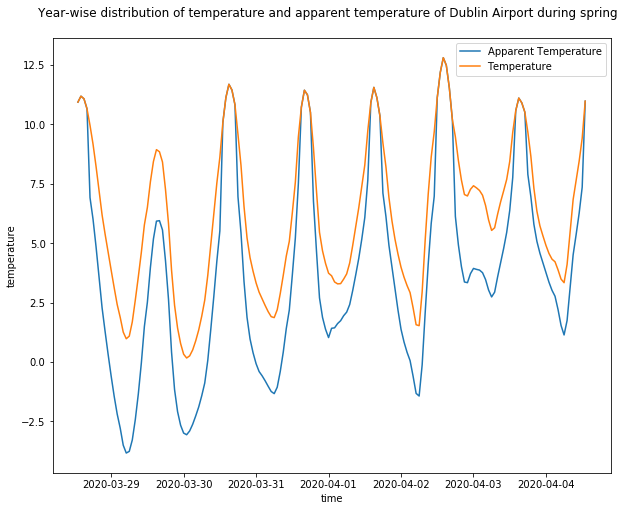

In [341]:
plt.figure()
plt.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.apparentTemperature, label='Apparent Temperature')
plt.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.temperature, label='Temperature')
plt.legend()
plt.title("Year-wise distribution of temperature and apparent temperature of Dublin Airport during spring  \n")
plt.ylabel("temperature")
plt.xlabel("time")
plt.show()

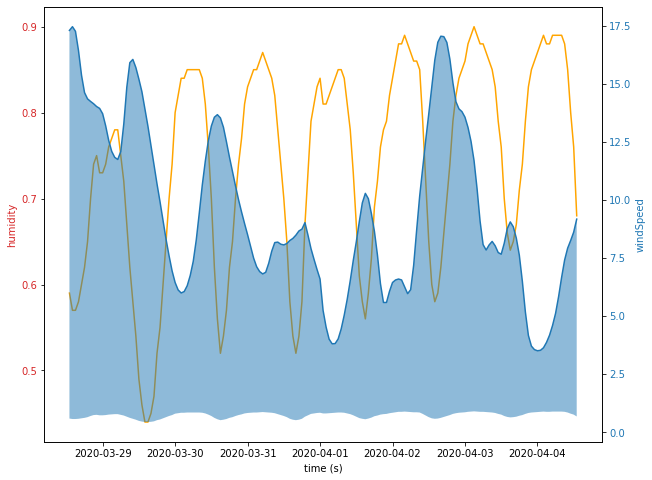

In [342]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('humidity', color=color)
ax1.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.humidity,color='orange')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('windSpeed', color=color)  # we already handled the x-label with ax1
ax2.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.windSpeed,color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.fill_between(DublinAirportWeatherHourlyDf.time, 
                 DublinAirportWeatherHourlyDf.humidity,
                 DublinAirportWeatherHourlyDf.windSpeed, 
                 where=None, interpolate=True,alpha=0.5)
plt.show()

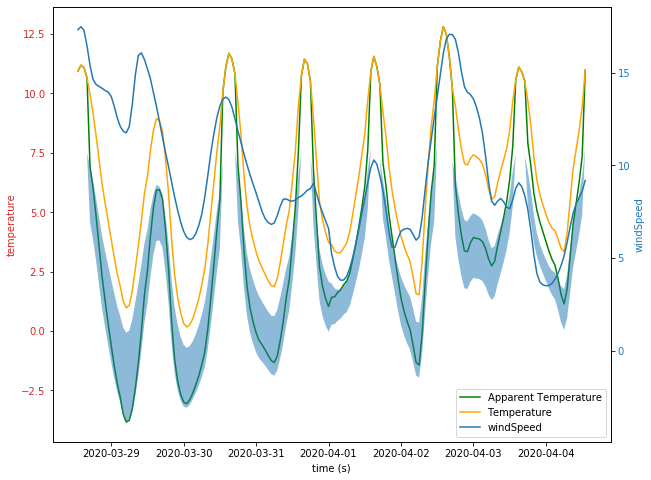

In [331]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('temperature', color=color)
lns1=ax1.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.apparentTemperature, label='Apparent Temperature',color='green')
lns2=ax1.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.temperature, label='Temperature',color='orange')
# ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('windSpeed', color=color)  # we already handled the x-label with ax1
lns3=ax2.plot(DublinAirportWeatherHourlyDf.time,DublinAirportWeatherHourlyDf.windSpeed,color=color,label='windSpeed')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.legend()+ax1.legend()
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs,loc=4)

plt.fill_between(DublinAirportWeatherHourlyDf.time, 
                 DublinAirportWeatherHourlyDf.temperature,
                 DublinAirportWeatherHourlyDf.apparentTemperature, 
                 where=None, interpolate=True,alpha=0.5)
plt.show()

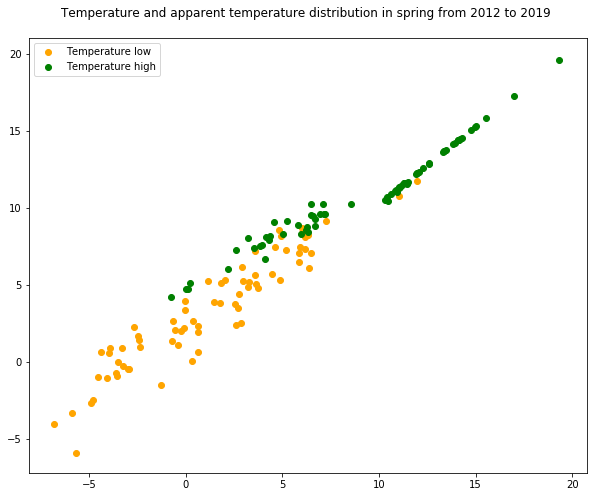

In [332]:
plt.figure()
plt.scatter(DublinAirportWeatherArchiveDaily.apparentTemperatureLow,DublinAirportWeatherArchiveDaily.temperatureLow,label='Temperature low',color='orange')
plt.scatter(DublinAirportWeatherArchiveDaily.apparentTemperatureHigh,DublinAirportWeatherArchiveDaily.temperatureHigh,label='Temperature high',color='green')
plt.legend()
plt.title("Temperature and apparent temperature distribution in spring from 2012 to 2019 \n")
plt.show()

In [333]:
#### creating a dataframe to store data yearwise without the date
df=DublinAirportWeatherArchiveDaily
i=1
while i==1:
    try :
        df['temperatureLowYear'] = df['temperatureLowTime'].dt.year
        df['temperatureHighYear'] = df['temperatureHighTime'].dt.year
        df['apparentTemperatureHighYear'] = df['apparentTemperatureHighTime'].dt.year
        df['apparentTemperatureLowYear'] = df['apparentTemperatureLowTime'].dt.year
        df['uvIndexYear'] = df['uvIndexTime'].dt.year
        i+=i
    except:
        continue


df=df.drop(['temperatureLowTime','temperatureHighTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
         'apparentTemperatureMinTime','temperatureMaxTime','temperatureMinTime'
         ,'uvIndexTime'], axis=1)




In [334]:
import seaborn as sns

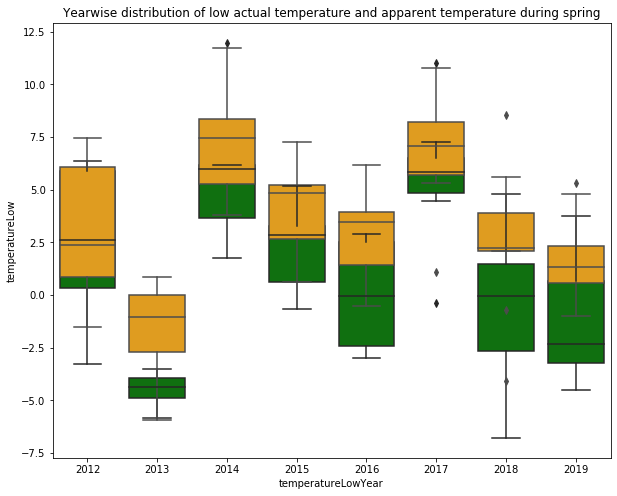

In [345]:
sns.boxplot(x=df.apparentTemperatureLowYear,y=df.apparentTemperatureLow,data=df,color='green').set_title('Yearwise distribution of low actual temperature and apparent temperature during spring')
sns.boxplot(x=df.temperatureLowYear,y=df.temperatureLow,data=df,color='orange')

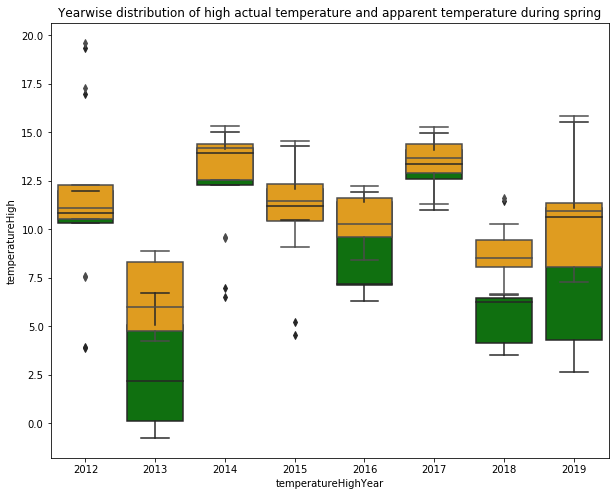

In [344]:
sns.boxplot(x=df.apparentTemperatureHighYear,y=df.apparentTemperatureHigh,data=df,color='green').set_title('Yearwise distribution of high actual temperature and apparent temperature during spring')
sns.boxplot(x=df.temperatureHighYear,y=df.temperatureHigh,data=df,color='orange')

In [ ]:
# sns.boxplot(x=df.temperatureLowYear,y=df.apparentTemperatureLow,data=df)

In [ ]:
#### The following the graphs communicates that the apparent temperature vary greatly as the temperature drops.
#### As the temperature increases in the spring the difference between the actual temperature and apparent temperature decreases significantly 